## Mall Customer Market Segmentation

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Preprocessing

In [6]:
df = data.copy()

In [7]:
df = df.drop('CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [8]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [9]:
gender_mappings = {index: label for index, label in enumerate(encoder.classes_)}
gender_mappings

{0: 'Female', 1: 'Male'}

In [10]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


### Clustering

In [13]:
max_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_df).inertia_ for i in range(len(kmeans_tests))]

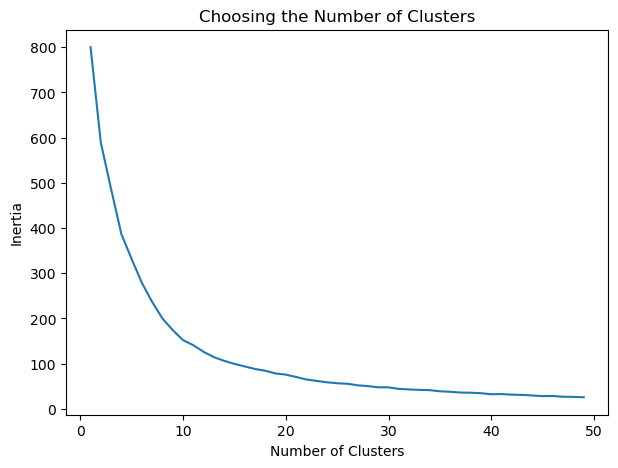

In [14]:
plt.figure(figsize=(7,5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Choosing the Number of Clusters')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_df)

KMeans(n_clusters=10, n_init=10)

In [16]:
clusters = kmeans.predict(scaled_df)
clusters

array([1, 1, 8, 6, 8, 6, 8, 6, 4, 6, 4, 6, 8, 6, 8, 1, 8, 1, 4, 6, 1, 1,
       8, 1, 8, 1, 8, 1, 8, 6, 4, 6, 4, 1, 8, 6, 8, 6, 8, 6, 3, 1, 4, 6,
       8, 6, 3, 9, 9, 9, 3, 1, 9, 4, 3, 4, 3, 4, 9, 4, 4, 1, 3, 3, 4, 1,
       3, 3, 1, 9, 4, 3, 3, 3, 4, 1, 3, 1, 9, 3, 4, 1, 4, 3, 9, 4, 3, 9,
       9, 3, 3, 1, 4, 9, 9, 1, 3, 9, 4, 1, 9, 3, 4, 1, 4, 9, 3, 4, 4, 4,
       4, 9, 9, 1, 9, 9, 3, 3, 3, 3, 1, 9, 9, 7, 9, 5, 2, 7, 4, 7, 2, 7,
       9, 5, 2, 5, 0, 7, 2, 5, 0, 7, 9, 5, 2, 7, 2, 5, 0, 7, 2, 7, 0, 5,
       0, 5, 2, 5, 2, 5, 3, 5, 2, 5, 2, 5, 2, 5, 0, 7, 2, 7, 2, 7, 0, 5,
       2, 7, 2, 7, 0, 5, 2, 5, 0, 7, 0, 7, 0, 5, 0, 5, 2, 5, 0, 5, 0, 7,
       2, 7], dtype=int32)

### PCA

In [17]:
pca = PCA(n_components=2)
reduced_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=['PC1', 'PC2'])
reduced_df

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [18]:
kmeans.cluster_centers_

array([[-0.88640526,  0.35421988,  1.24912183, -1.14745442],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [-0.88640526, -0.93245435, -1.29459798,  1.12360689],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [-0.88640526, -0.7906297 , -0.09294256, -0.14202221]])

In [19]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

/home/aditya/miniconda3/envs/dsenv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 0.81659377,  0.24505923],
       [-0.68838314,  0.28733559],
       [ 1.19961046,  1.30582744],
       [ 0.58233488, -0.85939176],
       [ 1.5303687 ,  0.17028966],
       [-1.38150389,  0.3644368 ],
       [-1.61307574, -1.33371367],
       [-0.88272588,  1.65431318],
       [ 0.75229959, -1.61087948],
       [-0.65343732, -0.55947734]])

In [20]:
reduced_df['cluster'] = clusters
reduced_df

,PC1,PC2,cluster
0,-0.406383,-0.520714,1
1,-1.427673,-0.367310,1
2,0.050761,-1.894068,8
3,-1.694513,-1.631908,6
4,-0.313108,-1.810483,8
...,...,...,...
195,-1.179572,1.324568,5
196,0.672751,1.221061,0
197,-0.723719,2.765010,7
198,0.767096,2.861930,2


In [24]:
reduced_df[reduced_df['cluster']==7].loc[:, 'PC1']

123   -0.818252
127   -0.876018
129   -0.441408
131   -0.392040
137   -0.684748
141   -1.218558
145   -1.523165
149   -1.040516
151   -0.740340
169   -0.421325
171   -0.938806
173   -0.997203
177   -0.828402
179   -0.994630
185   -1.429536
187   -0.755385
197   -0.723719
199   -1.065015
Name: PC1, dtype: float64

### Data Visualization

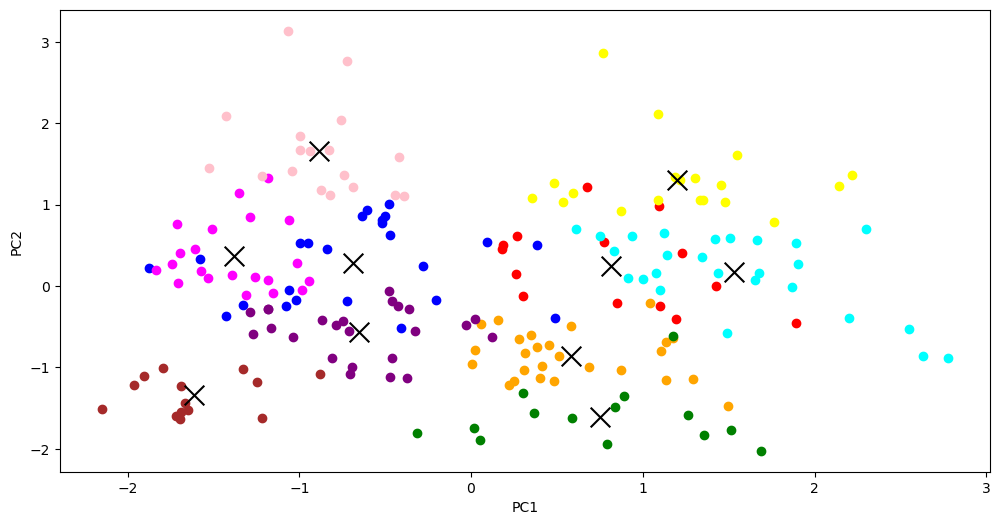

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(reduced_df[reduced_df['cluster']==0].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_df[reduced_df['cluster']==1].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_df[reduced_df['cluster']==2].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_df[reduced_df['cluster']==3].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_df[reduced_df['cluster']==4].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_df[reduced_df['cluster']==5].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_df[reduced_df['cluster']==6].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_df[reduced_df['cluster']==7].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_df[reduced_df['cluster']==8].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_df[reduced_df['cluster']==9].loc[:, 'PC1'], reduced_df[reduced_df['cluster']==9].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=200)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()